We present here the figures obtained in the convex case for the following paper: [Preserved central model for faster bidirectional compression in distributed settings](https://arxiv.org/pdf/2102.12528.pdf).

## Table of Contents

- [A bit of coding](#a-bit-of-coding)
- [A9A](#a9a)
- [Quantum](#quantum)
- [Phishing](#phishing)
- [Superconduct](#superconduct)
- [W8A](#w8a)

# A bit of coding

Below, we code a function that helps to generate and plot all figures.

In [1]:
# Add below current directory to path
# Notebook cannot import any code without this line !!!!
import sys; sys.path.insert(0, '..')

import numpy as np

from src.utils.ConvexSettings import batch_sizes, models, dimensions
from src.utils.Utilities import pickle_loader
from src.utils.runner.RunnerUtilities import create_path_and_folders
from src.utils.ErrorPlotter import plot_error_dist

from src.experiments_runner import batch_step_size

In [2]:
def regenerate_and_plot_all_figures(dataset: str):
    stochastic = True
    stochasticity = 'sto' if stochastic else "full"
    print("Mode: {0}".format(stochasticity))

    # Some configuration.
    batch_size = batch_sizes[dataset]
    model = models[dataset]
    dim = dimensions[dataset]
    nb_devices = 20
    algos = "mcm-vs-existing"
    iid = "non-iid"
    fraction_sampled_workers = 1
    if stochastic:
        experiments_settings = "{0}-b{1}".format(stochasticity, batch_size)
    else:
        experiments_settings = stochasticity

    # Getting path to pickle, data ...
    data_path, pickle_path, algos_pickle_path, picture_path = create_path_and_folders(nb_devices, dataset, iid, algos, 
                                                                                  fraction_sampled_workers)

    # Loading the pickle file.
    obj_min = pickle_loader("{0}/obj_min".format(pickle_path))
    print("Obj min:", obj_min)
    res = pickle_loader("{0}/descent-{1}".format(algos_pickle_path, experiments_settings))

    # Generating, saving, plotting the excess loss w.r.t. number of iterations and communicated bits.
    plot_error_dist(res.get_loss(obj_min), res.names, res.nb_devices, dim,
                    all_error=res.get_std(obj_min), x_legend="Number of passes on data",
                    picture_name="{0}/it-noavg-{1}".format(picture_path, experiments_settings))
    plot_error_dist(res.get_loss(obj_min), res.names, res.nb_devices, dim,
                    x_points=res.X_number_of_bits, x_legend="Communicated bits",
                    all_error=res.get_std(obj_min), picture_name="{0}/bits-noavg-{1}"
                    .format(picture_path, experiments_settings))
        

## A9A

Mode: sto
Obj min: 0.3196267667517586


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


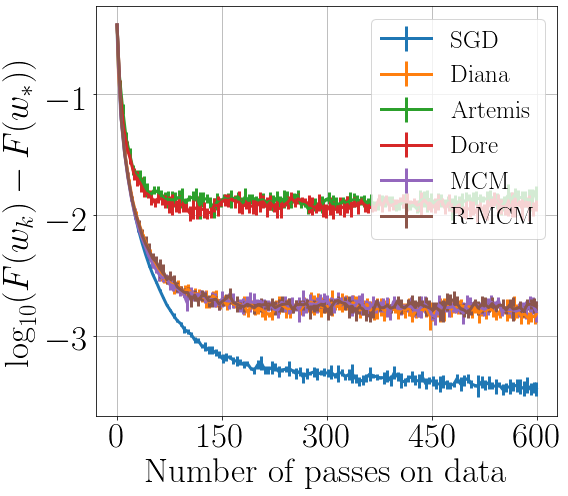

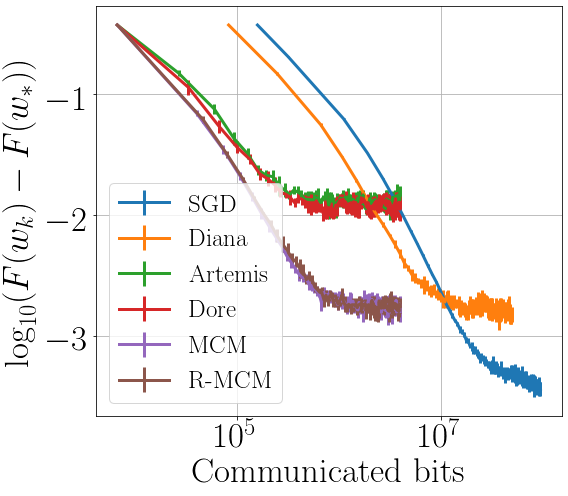

In [3]:
regenerate_and_plot_all_figures("a9a")

## Quantum

Mode: sto
Obj min: 0.5157690468539017


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


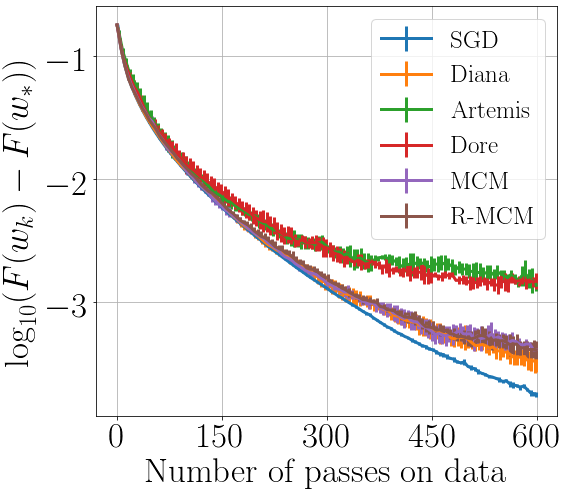

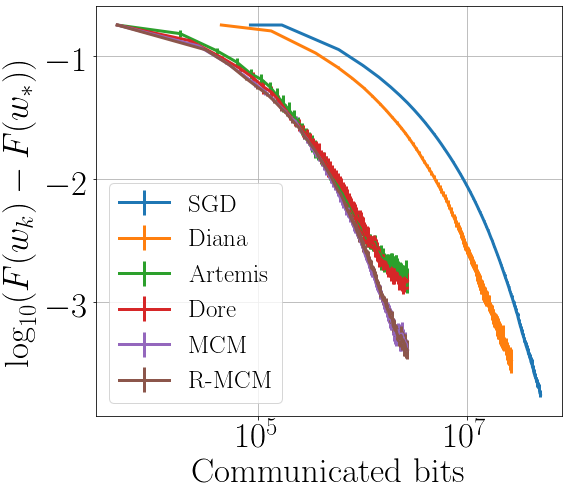

In [4]:
regenerate_and_plot_all_figures("quantum")

## Phishing

Mode: sto
Obj min: 0.12315846827546069


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


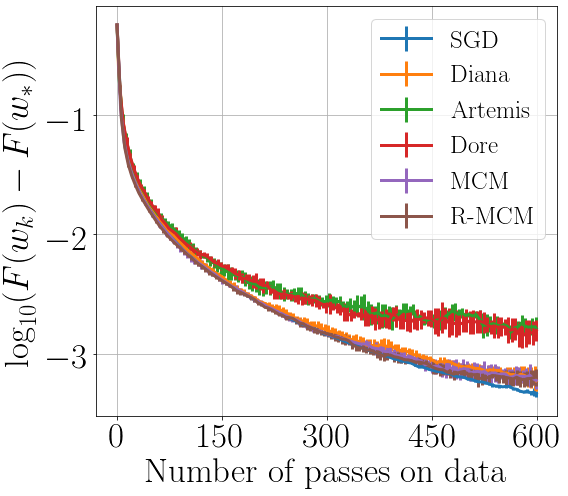

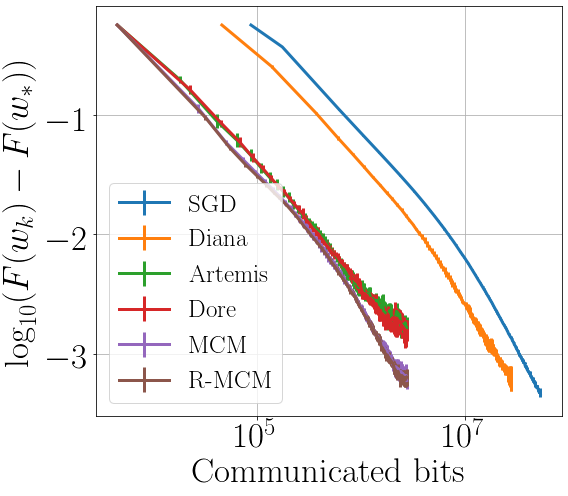

In [5]:
regenerate_and_plot_all_figures("phishing")

## Superconduct

Mode: sto
Obj min: 0.2654385570436716


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


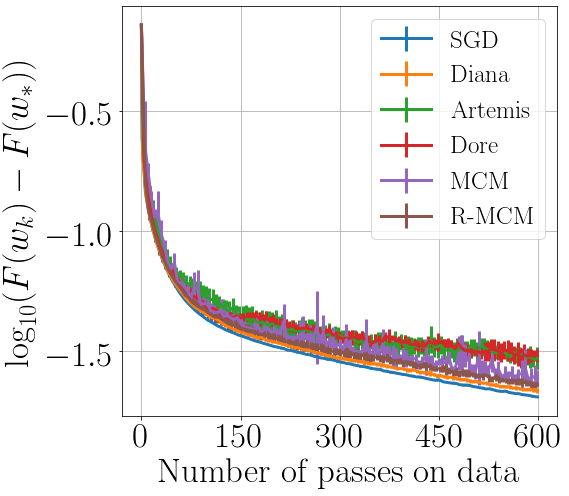

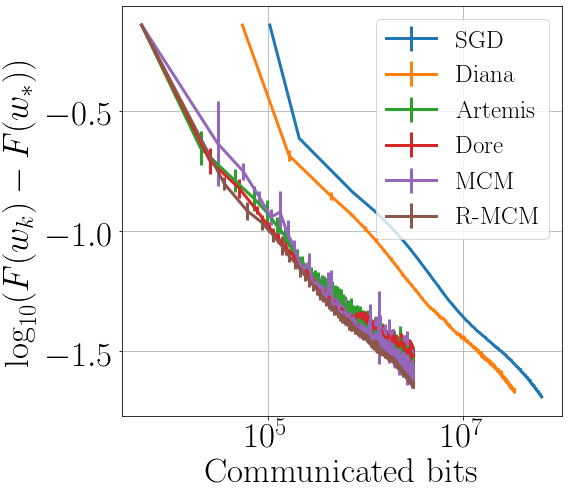

In [6]:
regenerate_and_plot_all_figures("superconduct")

## W8A

Mode: sto
Obj min: 0.07025592890497491


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


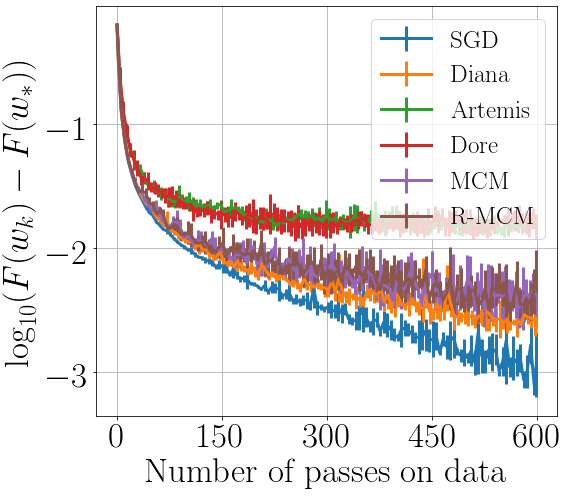

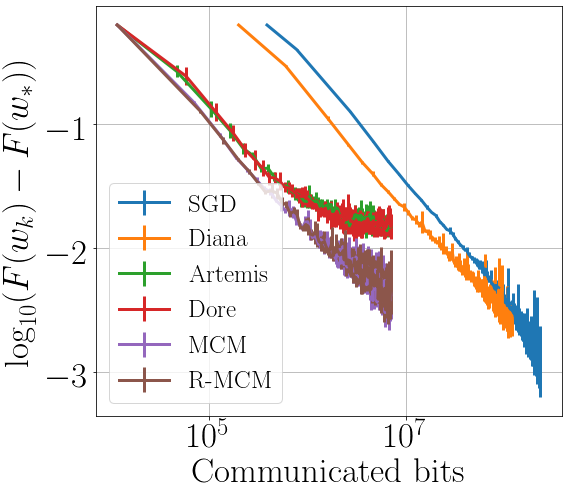

In [7]:
regenerate_and_plot_all_figures("w8a")